In [1]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv("lat_long_points.csv")
data.head()

,lat,lon
0,18.527103,73.927795
1,18.527183,73.927234
2,18.527114,73.927763
3,18.527098,73.927820
4,18.527104,73.927846


In [3]:
import matplotlib.pyplot as plt
from matplotlib import style

In [5]:
style.use('ggplot')

In [6]:
X=np.array(data)

In [7]:
X

array([[18.52710263, 73.92779457],
       [18.52718267, 73.92723362],
       [18.52711374, 73.927763  ],
       [18.52709803, 73.92782023],
       [18.52710374, 73.92784584],
       [18.52724512, 73.92757022],
       [18.52722938, 73.92852205],
       [18.52721017, 73.92887672],
       [18.52647354, 73.9284072 ],
       [18.5264351 , 73.92864027],
       [18.52644471, 73.92854907],
       [18.53073658, 73.91830828],
       [18.53074833, 73.91838882],
       [18.53066609, 73.91845697],
       [18.52997293, 73.91817817],
       [18.52943837, 73.91851273],
       [18.53733346, 73.91788483],
       [18.534936  , 73.92834183],
       [18.53361598, 73.93415448],
       [18.5336806 , 73.93464392],
       [18.53390969, 73.93411731],
       [18.53275248, 73.93534401],
       [18.5327701 , 73.93527586],
       [18.5327466 , 73.93532542],
       [18.53271723, 73.93528825],
       [18.52111712, 73.90670817],
       [18.52113313, 73.9067791 ],
       [18.52112353, 73.90674195],
       [18.52113954,

In [8]:
colors=10*['g','r','c','b','k']

In [9]:
from sklearn.cluster import KMeans

In [10]:
km=KMeans()

In [11]:
km.fit(X)

H:\AN\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
H:\AN\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans()

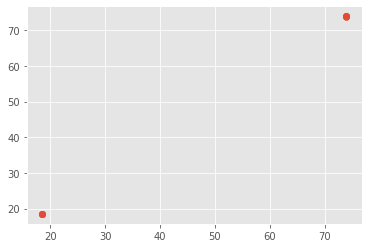

In [13]:
plt.scatter(km.cluster_centers_,km.cluster_centers_)

In [ ]:
km.class

In [ ]:
plt.scatter()

In [14]:
class K_Means:
    def __init__(self, k=4, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
                

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

          

In [15]:
clf=K_Means()
clf.fit(X)

0.020888063575575176
0.00786245757580427
0.021517875294384654


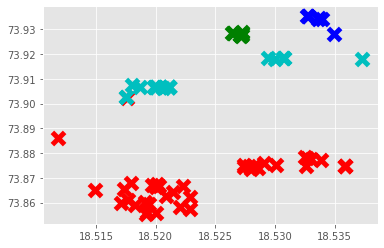

In [16]:
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
plt.show()

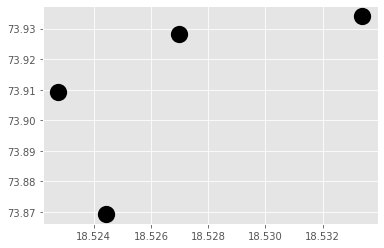

In [17]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

In [19]:
for centroid in clf.centroids:
    pl=clf.centroids[centroid][0], clf.centroids[centroid][1]

In [20]:
pl

(18.533391084376902, 73.93406138466261)

In [21]:
poi=clf.centroids

In [22]:
poi

{0: array([18.52696717, 73.92809298]),
 1: array([18.52442466, 73.86937992]),
 2: array([18.52275189, 73.90922108]),
 3: array([18.53339108, 73.93406138])}

In [23]:
import pydeck as pdk

In [ ]:
#layers setting
layers=pdk.Layer('HexagonLayer',
    data,
    get_position=['Longitude', 'Latitude'],
    auto_highlight=True,
    elevation_scale=50,
    pickable=True,
    elevation_range=[0, 3000],
    extruded=True,                 
    coverage=1)

#view Port Location
view_state=pdk.ViewState(longitude=78.348516,
    latitude=22.824289,
    zoom=6,
    min_zoom=1,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

# Render
r = pdk.Deck(layers=[layers], initial_view_state=view_state)
r.to_html('demo.html')